Obtenemos los datos y descomprimimos

In [1]:
#descargar la base de datos
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-11-03 01:31:48--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.96.86, 52.216.212.184, 54.231.230.168, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.96.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  74.9MB/s    in 0.2s    

2023-11-03 01:31:48 (74.9 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


Imprimimos los encabezados y separamos los datos del encabezado

In [2]:
#extraer los datos del archivo
import os
fname = os.path.join("jena_climate_2009_2016.csv")
#leer el archivo
with open(fname) as f:
   data = f.read()
#separar los datos en el archivo
lines = data.split("\n") #separar todos los datos con espacios
header = lines[0].split(",") #separar las columnas encabezados (lines[0]) con comas
lines = lines[1:]
print(header)
print(len(lines))
print(lines[0].split(",")[0])

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451
01.01.2009 00:10:00


Separamos datos de temperatura y los demás

In [4]:
import numpy as np
temperature = np.zeros((len(lines),)) #crear array para guarda la temperatura
raw_data = np.zeros((len(lines), len(header) - 1)) #Arreglo para guardar los datos, quitando una columna

#i será el indice y line el contenido de lines (una lista de una fila de datos del archivo) iterativamente
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]] #lista con los valores de la fila (va fila por fila), excluyendo las fechas con la hora y pasando cada una a float
  temperature[i] = values[1] #guardar los valores de la columna "T (degC)" en cada iteración
  raw_data[i, :] = values[:] #guardar todos los datos


In [ ]:
print(raw_data[:12000,:].reshape(100,120,14)) #raw_data es de tamaño (420451,14)

[[[ 9.96520e+02 -8.02000e+00  2.65400e+02 ...  1.03000e+00  1.75000e+00
    1.52300e+02]
  [ 9.96570e+02 -8.41000e+00  2.65010e+02 ...  7.20000e-01  1.50000e+00
    1.36100e+02]
  [ 9.96530e+02 -8.51000e+00  2.64910e+02 ...  1.90000e-01  6.30000e-01
    1.71600e+02]
  ...
  [ 1.00014e+03 -4.97000e+00  2.68180e+02 ...  6.00000e-01  1.00000e+00
    1.58700e+02]
  [ 1.00018e+03 -4.99000e+00  2.68160e+02 ...  5.50000e-01  8.80000e-01
    1.58400e+02]
  [ 1.00022e+03 -4.90000e+00  2.68240e+02 ...  6.80000e-01  1.13000e+00
    1.95200e+02]]

 [[ 1.00027e+03 -4.93000e+00  2.68210e+02 ...  6.30000e-01  1.13000e+00
    2.06500e+02]
  [ 1.00021e+03 -4.89000e+00  2.68260e+02 ...  5.80000e-01  1.00000e+00
    1.69900e+02]
  [ 1.00019e+03 -4.93000e+00  2.68210e+02 ...  1.04000e+00  1.50000e+00
    1.56200e+02]
  ...
  [ 9.99320e+02 -2.55000e+00  2.70670e+02 ...  2.39000e+00  3.63000e+00
    2.61500e+01]
  [ 9.99460e+02 -2.65000e+00  2.70560e+02 ...  2.94000e+00  4.00000e+00
    1.57100e+01]
  [ 9.9

Graficamos la serie de tiempo de temperaturas

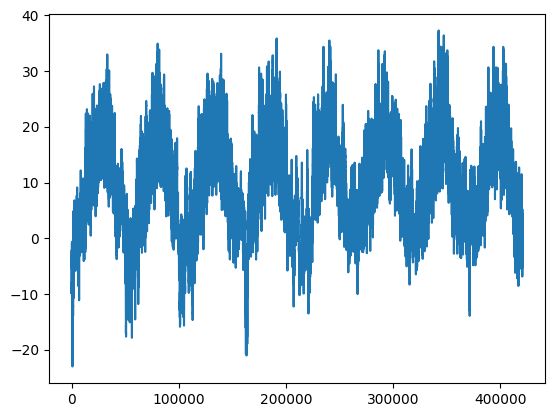

In [ ]:
# Graficar el registro de las temperaturas
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

Los datos son tomados cada 10 minutos. Tienen mucha resolución!!. Por ejemplo, podemos graficar los primeros diez días. 24x6=144 <- Es el número de datos correspondiente a un día.

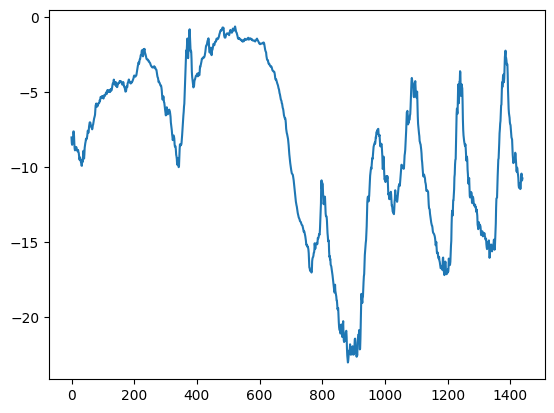

In [ ]:
#ver los datos para un día
plt.plot(range(1440), temperature[:1440])

Analizar el siguiente código para identificar la funcionalidad de la función : keras.utils.timeseries_dataset_form_array()

In [ ]:
from tensorflow import keras
import numpy as np
int_sequence = np.arange(10) #Generamos un array de enteros del 0 al 9

#Hace un dataset especifico para serie de Tiempo, lo cual es muy conveniente para organizar nuestros datos
#los toma de una secuencia arbitraria, en este ejemplo la de int_sequence(de 0 a 9)
dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],    #secuencia para valores de x, toma el tamaño de datos para la secuencia escogida
    #toma solo los datos de la lista asignada a data, segun el tamaño de la secuencia y  el batch
    targets = int_sequence[3:], #secuencia para extraer los valores y, también toma la siguiente serie a predecir (dependiendo del tamaño del batch)
    #da un dato en la lista por batch, según como vaya la lisa

    #el valor del slicing que tratan en data y targets es el delay de la serie o la distancia de predicción de los datos

    sequence_length=3,  #tamano de las secuencias x, cada fila
    batch_size=3,  #cada vez que se llame "dataset" nos regresara un batch de 2 secuencias
)


for inputs, targets in dataset:
  print("series x")
  print(inputs)
  print("y")
  print(targets)

series x
tf.Tensor(
[[0 1 2]
 [1 2 3]
 [2 3 4]], shape=(3, 3), dtype=int64)
y
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
series x
tf.Tensor(
[[3 4 5]
 [4 5 6]], shape=(2, 3), dtype=int64)
y
tf.Tensor([6 7], shape=(2,), dtype=int64)


O bien, si queremos visualizar de forma mas ordenada

In [ ]:
for inputs, targets in dataset: #extraer lotes por iteración
   for i in range(inputs.shape[0]): #extraer un batch por iteración
     print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


## Tarea



1.   Genera secuencias x para entrenamiento (50%), validación (25%) y prueba (25%) de 120 elementos de longitud a partir de los datos de temperatura.
Aquí hay un ejemplo de una forma de lograrlo para generar un conjunto de secuencias:



In [ ]:
print(float(len(temperature)))
#dividimos laa cantidad de datos entre 4
#así podremos organizar los datos
#son 105112.75 datos para 4 partes iguales, por lo que redondeamos hacia abajo (floor), haciendo que tengamos lotes de la misma cantidad
temp_tr=temperature[0:105112*2].copy()
temp_val=temperature[105112*2:(105112*3)].copy()
temp_ts=temperature[(105112*3):105112*4].copy()

#comprovamos que las longitudes sean iguales
print(f"la longitud de los datos de entrenamiento es: {len(temp_tr)}")
print(f"la longitud de los datos de validación es: {len(temp_val)}")
print(f"la longitud de los datos de testeo es: {len(temp_ts)}")
print(f'lalongitud de los datos totales es: {len(temp_tr)+len(temp_val)+len(temp_ts)}')
#solo evitamos usar los últimos 3 datos




420451.0
la longitud de los datos de entrenamiento es: 210224
la longitud de los datos de validación es: 105112
la longitud de los datos de testeo es: 105112
lalongitud de los datos totales es: 420448


In [ ]:
#definimos los datsets
#delay define los datos a predecir en el futurp
tr_y_val=temperature[0:105112*3].copy() #conjunto de datos que representa el 75% del total (50% para tr y 25% para val)
ts=temperature[105112*3:-3].copy() #conjunto de datos que representa el 25% (podemos quitarle el "-3" para que tome los 3 datos que nos faltaron)

val_dataset = keras.utils.timeseries_dataset_from_array(
    data=tr_y_val[:-10], #serie de tiempo base (base de datos)
    targets=tr_y_val[10:], #predicciones para las series
    sampling_rate=1, #la frecuencia con la que se toma un dato de la serie de tiempo como base de datos, (1 es todos los datos, 2 son cada dos datos y así)
    sequence_length=120, #cantidad de datos a tomar en un batch
    shuffle=True,#barajear los datos, puede ser buena opción si no hay dependencia en el tiempo y se desea abstraer patrones generales de la serie
    batch_size=2, #tamaño del batch
    #podemos usar estos índices para definir el conjunto de validación (estos parámetros toman un conjunto de datos de validación a partir del conjunto de datos de la entrada)
    #haciendo que los que sobren sean de entrenamiento
    start_index=105112*2,
    end_index=105112*3-10-1) #indice de inicio y fin del dataset a partir de la longitud de los datos de entrada
print(val_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


Con estos ejemplos en mente, vamos a aprovechar la característica de este dataset y solo definimos e conjunto de tr y val, y el restante será de validación

In [5]:

#podemos hacer un objeto para poner la lista de datos que queramos y evitar cambiar todo manualmente
from tensorflow import keras
import numpy as np
class datos:
    def __init__(self, datoslist,predlist):
      """Divide los datso en 50% training, 25% validation y 25% Test"""
      self.cuarto=len(datoslist)//4 #un cuarto del total de los datos de la lista
      self.descarte=(len(datoslist)%4) #num de datos que descartamos para que el total de datos sea divisible entre 4
      #ajustaremos las cantidades de los datos a usarse en train, val y test usando los indices de los datasets
      self.data=datoslist #almacenamos la base de datos a usarse para la predicción
      self.targets=predlist #almacenamos en los datos objetivos a predecir



    def dataset_tr_seriet(self,numpredic,frecseq,numseq,barajear,tambatch):
      """
      Da un dataset de series temporales para training

      numpredic es la cantidad de delay de las predicciones en el futuro,
      frecseq es la frecuencia de la toma de datos (ajustar la precisión temporar de los datos),
      numseq es la cantidad de datos que toma la red para la predicción,
      barajear=True para activar un shuffle en los datos,
      tambach es el tamaño del batch
      """

      dataset = keras.utils.timeseries_dataset_from_array(
        data=self.data[:-numpredic],
        targets=self.targets[numpredic:],
        sampling_rate=frecseq,
        sequence_length=numseq,
        shuffle=barajear,
        batch_size=tambatch,
        # el 50% de los datos
        start_index=0, # desde 0
        end_index=self.cuarto*2) #hasta el 50% del total de datos
      return dataset

    def dataset_val_seriet(self,numpredic,frecseq,numseq,barajear,tambatch):
      """
      Da un dataset de series temporales para validación

      numpredic es la cantidad de delay de las predicciones en el futuro,
      frecseq es la frecuencia de la toma de datos (ajustar la precisión temporal de los datos),
      numseq es la cantidad de datos que toma la red para la predicción,
      barajear=True para activar un shuffle en los datos,
      tambach es el tamaño del batch
      """

      dataset = keras.utils.timeseries_dataset_from_array(
        data=self.data[:-numpredic],
        targets=self.targets[numpredic:],
        sampling_rate=frecseq,
        sequence_length=numseq,
        shuffle=barajear,
        batch_size=tambatch,
        #25% de los datos
        start_index=self.cuarto*2, #desde el indice anterior correspondiente al 50% de los datos
        end_index=self.cuarto*3) #hasta el indice correspondiente al 75% de los datos
      return dataset


    def dataset_ts_seriet(self,numpredic,frecseq,numseq,barajear,tambatch):
      """
      Da un sataset para series temporales para el testeo
      numpredic es la cantidad de delay de las predicciones en el futuro,
      frecseq es la frecuencia de la toma de datos (ajustar la precisión temporar de los datos),
      numseq es la cantidad de datos que toma la red para la predicción,
      barajear=True para activar un shuffle en los datos,
      tambach es el tamaño del batch
      """
      dataset = keras.utils.timeseries_dataset_from_array(
        data=self.data[:-numpredic],
        targets=self.targets[numpredic:],
        sampling_rate=frecseq,
        sequence_length=numseq,
        shuffle=barajear,
        batch_size=tambatch,
        #el restante de datos, el 25% del total (sin contar los sobrantes, en el dataset se incluyen)
        start_index=self.cuarto*3)
      return dataset

dfut=10 #delay
pres=6 #toma una medición cada hora de los datos
predbase=120 #secuencia de datos para predecir
batchsz=100 #tamaño del batch

#usamos false en el barajeo (shuffle) porque le damos importancia al seguimiento temporal de la serie

temp=datos(raw_data,temperature) #establecer una lista de datos y de objetivos para obtener los datasets

temp_dstr=temp.dataset_tr_seriet(dfut,pres,predbase,True,batchsz) #dataset para entrenar
temp_dsval=temp.dataset_val_seriet(dfut,pres,predbase,True,batchsz) #dataset para entrenar
temp_dsts=temp.dataset_ts_seriet(dfut,pres,predbase,True,batchsz) #dataset para prueba


El reto en el código de arriba es simplemente calcular los valores de start_index y end_idex para obtener el número de secuencias x desadas.

2. Construye y entrena una red que estime la temperatura 10 pasos en el futuro. Puedes usar tanto Conv1D o bien LSTM

3. Prueba ahora como datos de entrada las demás variables como presión y las demás.

Aquí hay un ejemplo de como tendrías que constuir las series de tiempo para el último ejercicio:

In [ ]:
val_dataset = keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay], #notar que ahora la serie en x son las demás columnas de los datos
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

Tarea Inciso 2:

In [ ]:
#crear una arquitectura
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Lambda, Convolution1D


def slice(x, slice_length): #definir una función para partir los datos en axis=1 (las columnas)
    return x[:,-slice_length:,:]

modelo =Sequential()
modelo.add(Convolution1D(filters=32,kernel_size=5, padding='causal',dilation_rate=1, #config usaul de Condv1D y ponemos una dilatación
                         batch_input_shape=(None,None,1))) #entrada arbitraria, usar cualquier tamaño de 1 de profundidad
modelo.add(Convolution1D(filters=32, kernel_size=5, padding='causal',dilation_rate=2))
modelo.add(Convolution1D(filters=32, kernel_size=5, padding='causal',dilation_rate=4))
modelo.add(Convolution1D(filters=32, kernel_size=5, padding='causal',dilation_rate=8))
#modelo.add(Convolution1D(filters=32, kernel_size=5, padding='causal',dilation_rate=32))

modelo.add(Dense(1)) #preparar la respuesta para ser comparada con MSE
modelo.add(Lambda(slice, arguments={'slice_length':10})) #crea una capa personalizada con la función slice, usando como argumento de slice_length el tamaño de 10 datos para predecir

modelo.summary()
modelo.compile(optimizer='adam',loss='mean_squared_error')


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32)          192       
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          5152      
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          5152      
                                                                 
 conv1d_3 (Conv1D)           (None, None, 32)          5152      
                                                                 
 dense_7 (Dense)             (None, None, 1)           33        
                                                                 
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
Total params: 15681 (61.25 KB)
Trainable params: 15681

Entrené la red con las configuraciones del bloque de abajo, pero con malos resultados (como podrán ver en las 2 horas de entrenaiento) por lo que opte intentar por las estructuras de LSTM, pero dejo el intento.

Igual, en este intento me confundí y entrené la temperatura con los mismos datos de temperatura, pero al ver el rendimiento mejor me puse a trabajar en la LSTM.

In [ ]:
histdil = modelo.fit(temp_dstr,
                    epochs=100,
                    batch_size=50,
                    validation_data=temp_dsval,
                     verbose=1)

Epoch 1/100


ValueError: ignored

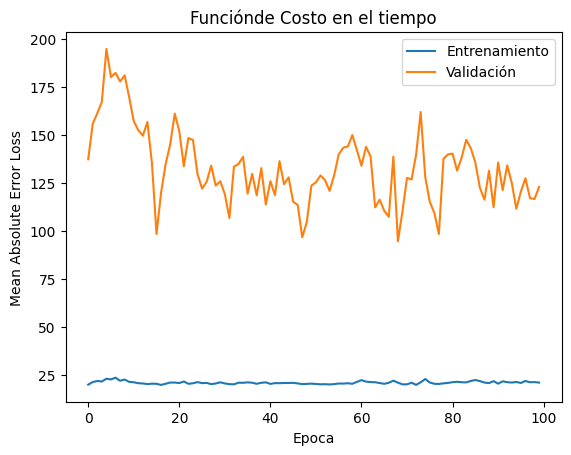

In [ ]:
#graficar entrenamiento
plt.plot(histdil.history['loss'])
plt.plot(histdil.history['val_loss'])
#plt.plot(histdil.history['accuracy'])

plt.xlabel('Epoca')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Funciónde Costo en el tiempo')
plt.legend(['Entrenamiento','Validación'])

In [6]:
from keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.models import Sequential, save_model

modeloL = Sequential()
modeloL.add(LSTM(80, input_shape=(120,14), batch_input_shape=(batchsz,120,14)))
modeloL.add(Dropout(0.2))
modeloL.add(Dense(1))

modeloL.compile(loss='mse', optimizer='RMSprop',metrics=["mae"])
earlycall=keras.callbacks.EarlyStopping(monitor = "loss", patience = 5, mode = "auto") #configuramos un early stopping
modeloL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (100, 80)                 30400     
                                                                 
 dropout (Dropout)           (100, 80)                 0         
                                                                 
 dense (Dense)               (100, 1)                  81        
                                                                 
Total params: 30481 (119.07 KB)
Trainable params: 30481 (119.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Con esta arquitectura empecé a hacer algunos experimentos, lo probé para 10 epocas y dió resultados significativamente mejores, por lo que decidí enfocarme en mejorarlo (aunque es mucho más tardado)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from keras.api._v2.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

ruta_check= '/content/drive/My Drive/modelo_checkpoints.h5'

checkpoint = ModelCheckpoint(ruta_check, save_best_only=True, monitor='val_loss', mode='min', verbose=1)

historial=modeloL.fit(temp_dstr,
            epochs=100,
            batch_size=batchsz,
            validation_data=temp_dsval,
            callbacks=[earlycall,checkpoint],
              verbose=1)
save_model(modeloL,"/content/drive/My Drive/pred_temp.h5")

Epoch 1/100
2095/2096 [============================>.] - ETA: 0s - loss: 48.8578 - mae: 5.4067
Epoch 1: val_loss improved from inf to 24.52928, saving model to /content/drive/My Drive/modelo_checkpoints.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2096/2096 [==============================] - 439s 209ms/step - loss: 48.8582 - mae: 5.4068 - val_loss: 24.5293 - val_mae: 3.9008
Epoch 2/100
2095/2096 [============================>.] - ETA: 0s - loss: 26.3266 - mae: 4.0118
Epoch 2: val_loss improved from 24.52928 to 23.35330, saving model to /content/drive/My Drive/modelo_checkpoints.h5
2096/2096 [==============================] - 437s 209ms/step - loss: 26.3261 - mae: 4.0118 - val_loss: 23.3533 - val_mae: 3.9059
Epoch 3/100
2096/2096 [==============================] - ETA: 0s - loss: 18.8995 - mae: 3.3415
Epoch 3: val_loss improved from 23.35330 to 11.29687, saving model to /content/drive/My Drive/modelo_checkpoints.h5
2096/2096 [==============================] - 436s 208ms/step - loss: 18.8995 - mae: 3.3415 - val_loss: 11.2969 - val_mae: 2.6515
Epoch 4/100
2096/2096 [==============================] - ETA: 0s - loss: 15.7696 - mae: 3.0344
Epoch 4: val_loss improved from 11.29687 to 10.27817, saving model to /content/drive/My Drive/mo

<ipython-input-9-dfbdf278111a>:14: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(modeloL,"/content/drive/My Drive/pred_temp.h5")


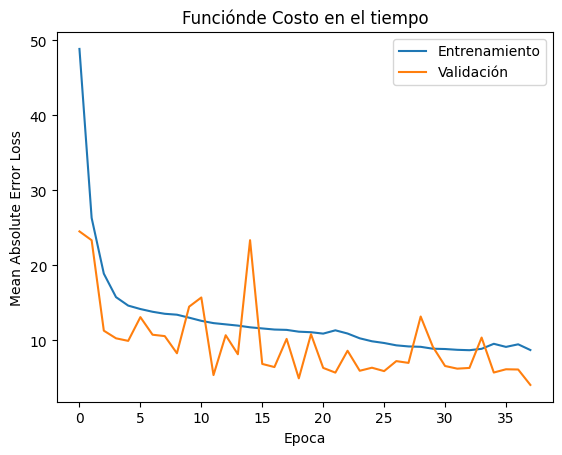

In [10]:
#graficar entrenamiento
import matplotlib.pyplot as plt
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
#plt.plot(histdil.history['accuracy'])

plt.xlabel('Epoca')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Funciónde Costo en el tiempo')
plt.legend(['Entrenamiento','Validación'])


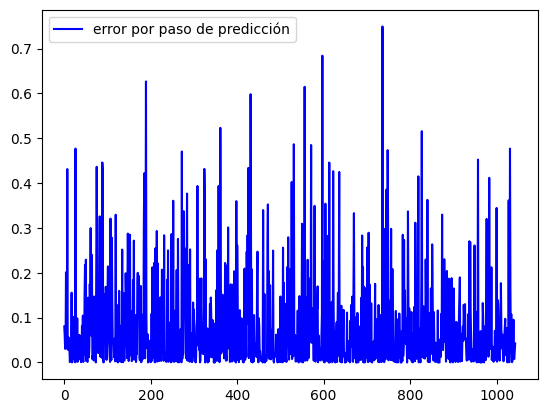

In [11]:
#analizamos el error de la red (testeo)
mse=[]
for x,y in temp_dsts:
  mse.append(np.average(modeloL.predict(x,verbose=0).reshape(y.numpy().shape)-y.numpy())**2)

plt.plot(range(0,len(temp_dsts)),mse,label="error por paso de predicción",color="b")
plt.legend()
plt.show()

In [12]:
#error promedio total
errprom=np.average(mse)
print(errprom) #no esta mal

0.08034457433842655


In [ ]:

#creamos un dataset sin shuffle para probrar
#usamos el método dataset_tr_seriet de la clase usada anteriormente (aprovechando) para que sea la primera mitad del dataset completo
temp_prueba=temp.dataset_tr_seriet(10,6,120,False,100) #dataset con 10 de delay, qye tome un dato cada hora, 120 datos por secuencia, sin barajeo y 100 batches
y_pred=[]
ys_real=[]
temperaturas=[]

for x,y in temp_prueba.take(1): #tomamos el primer lote de el dataset de testeo, que es una tupla de (datos,targets) de tamaño (100,120,14) y (100,) respectivamente
  y_pred.append(modeloL.predict(x).reshape(batchsz,)[-1]) #tenemos que usar la predicción de la red con datos en forma de los datasets (en mi caso de tamaño (100,120,14))
  ys_real.append(y.numpy()[0])
  temperaturas.append(x.numpy()[0,:,1]) #tomamos del primer lote, el primer


temperaturas= np.array(temperaturas).reshape(120,)
plt.title('Serie temporal de temperaturas (temp por hora)')
plt.plot([i for i in range(0,120)],temperaturas)
plt.scatter(121,ys_real[0],color='orange',label='Siguiente dato real')
plt.scatter(121,y_pred[0],color='red', label='Siguiente dato predicho')
plt.show()




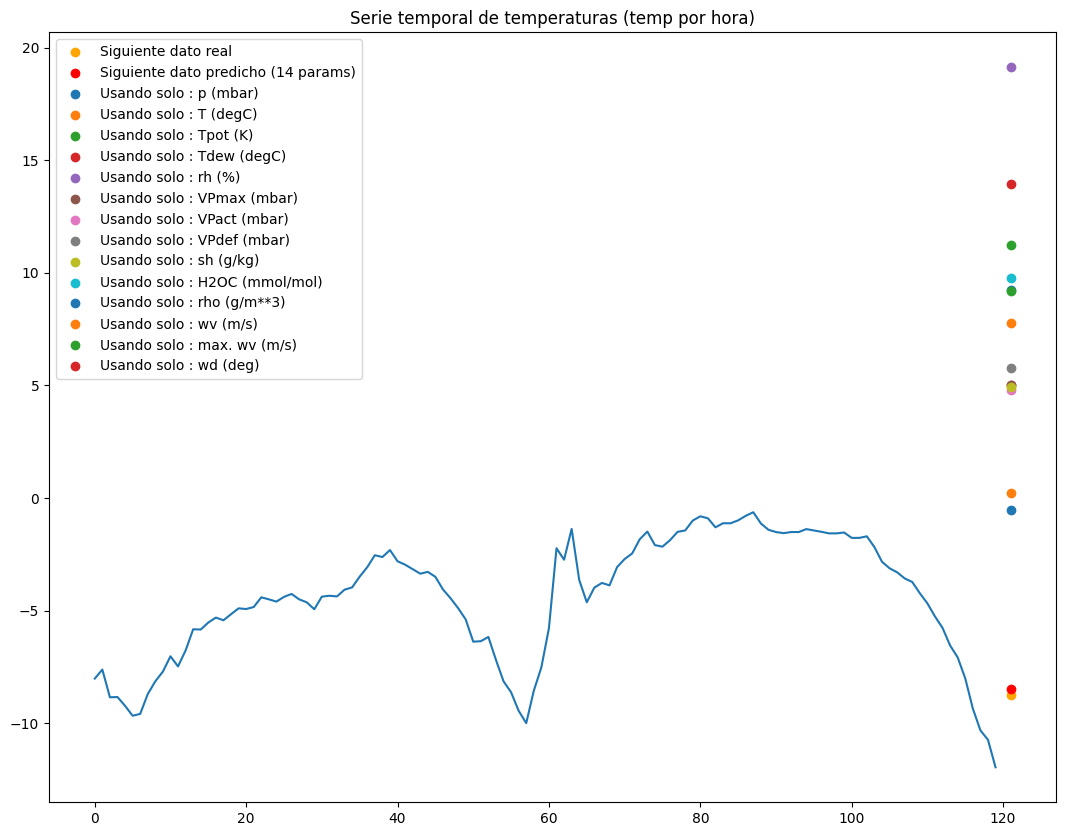

In [105]:
#cargamos los headers de la base de datos original
pnombres=["p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"]
#creamos una lista vacia para guardar una lista de matrices
params=[]
#creamos un dataset sin shuffle para probrar
#usamos el método dataset_tr_seriet de la clase usada anteriormente (aprovechando) para que sea la primera mitad del dataset completo
temp_prueba=temp.dataset_tr_seriet(10,6,120,False,100) #dataset con 10 de delay, qye tome un dato cada hora, 120 datos por secuencia, sin barajeo y 100 batches
for x,y in temp_prueba.take(1): #tomamos un lote de el dataset de testeo, que es una tupla de (datos,targets) de tamaño (100,120,14) y (100,) respectivamente
  ys_real=(y.numpy()[0]) #guardamos la respuesta real de la primera secuencia del primer batch del lote
  y_predictot=(modeloL.predict(x[0].numpy().reshape(1,120,14),verbose=0)).reshape(1,) #predecimos el equivalente de la respuesta, con todos los parámetros
  #aquí guardaremos columnas por separado de cada parámetro para probarla en la red, teniendo cuidado de que el tamaño sea congruente con el input del modelo
  for i in range(14):
    parac=np.zeros((1,120,14))
    parac[:,:,i]=x.numpy()[0,:,i] #guardamos cada columna en tamaños (1,120,14) llenando los demás espacios con ceros
    params.append(parac)#lo guardamos en una lista de 14 elementos, uno por cada parámetro

#creamos una lista con las respuestas de la red a cada parámetro indicidualemnte
resp_params=[modeloL.predict(np.array(params)[i,0,:,:].reshape(1,120,14),verbose=0).reshape(1,) for i in range(0,14)]

#graficamos la respuesta
plt.figure(figsize=(13,10))
plt.title('Serie temporal de temperaturas (temp por hora)')
plt.plot([i for i in range(0,120)],params[1][:,:,1].reshape(120,))
plt.scatter(121,ys_real,color='orange',label='Siguiente dato real')
plt.scatter(121,y_predictot,color='red', label='Siguiente dato predicho (14 params)') #respuesta con todos los parámetros

#respuesta individual
for i,n in enumerate(pnombres):
  plt.scatter(121,resp_params[i],label=f'Usando solo : {n}')

plt.legend()
plt.show()

In [98]:
"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"'

[19.135752]
